# Program - plot TaiESM hindcast and initial profile at one grid point

**Content:**

plot TaiESM hindcast and initial profile, given date, lat, and lon.

This is useful for see when the model starts to diverge.

**Author**: Yi-Hsuan Chen (yihsuan@umich.edu)

In [81]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import io, os, sys, types

import yhc_module as yhc

xr.set_options(keep_attrs=True)  # keep attributes after xarray operation

## define functions

### read_da

In [82]:
def read_da( data_source, 
             varname = "T",
             date = "2001-07-10",
             tt=0, jj=110, ii=192, 
           ):

    if (data_source == "hindcast"):
        datapath = "/lfs/home/yihsuanc/data/data.TaiESM1_hindcast/data.TaiESM1.July2001_hindcast02/run"
        filename_head = "hindcast02_2001July-taiesm1.F_2000_TAI.f09_f09.icdate_" 
        year, month, day = date.split("-")
        date_combined = year + month + day
        filename = f"{filename_head}{date_combined}.cam.h1_state_3h.{date}-00000.nc"
        #print(filename)
    
    elif (data_source == "cami"):
        datapath = "/lfs/home/yihsuanc/data/data.TaiESM1_hindcast/data.July2001_ERA5.hindcast/"
        filename_head = "cami-snap_0000-01-01_0.9x1.25_L30.ERA5_ic."
        year, month, day = date.split("-")
        date_combined = year + "_" + month + "_" + day
        filename = f"{filename_head}{date_combined}_00Z.nc"
    
    infile = datapath+"/"+filename
    ds = xr.open_dataset(infile)

    var = ds.get(varname)[tt, :, jj, ii]
    pp = ds.hyam * ds.P0 + ds.hybm * ds.PS[tt, jj, ii]
    
    return var, pp

#-----------
# do_test
#-----------

do_test=True
#do_test="t1"
if (do_test == "t1"):
    #data_source = "hindcast"
    data_source = "cami"
    var1, pp1 = read_da(data_source)

    data_source = "hindcast"
    var2, pp2 = read_da(data_source, tt=3)


### plot_da

In [83]:
def plot_da( varname = "T",
             date = "2001-07-10",
             tt_hindcast=0, tt_cami=0, 
             jj=110, ii=192, 
           ):

    #--- read data
    data_source = "cami"
    var1, pp1 = read_da(data_source, varname=varname, date=date, tt=tt_cami, jj=jj, ii=ii)

    data_source = "hindcast"
    var2, pp2 = read_da(data_source, varname=varname, date=date, tt=tt_hindcast, jj=jj, ii=ii)

    #--- plot
    # Plot for the first set [var1, pp1]
    plt.plot(var1, pp1, label='cami')
    
    # Plot for the second set [var2, pp2]
    plt.plot(var2, pp2, label='hindcast')
    
    # Add labels and title
    plt.xlabel(varname)
    plt.ylabel('Pressure (Pa)')

    title = f"{date}, tt_cami={tt_cami}, tt_hindcast={tt_hindcast}, jj={jj}, ii={ii}"
    plt.title(title)
    
    # Add legend
    plt.legend()
    
    # Reverse y-axis
    plt.gca().invert_yaxis()
    
    # Show plot
    plt.show()

#plot_da()

## plot

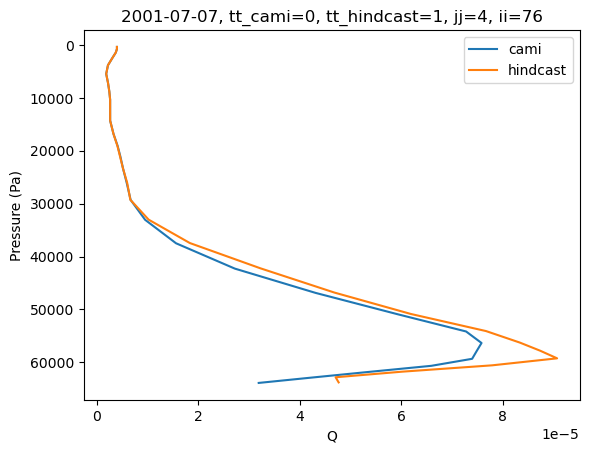

In [84]:
varname = "Q"
date = "2001-07-07"
tt_hindcast=1
tt_cami=0 
jj=4 ; ii=76

plot_da( varname = varname,
             date = date,
             tt_hindcast=tt_hindcast, tt_cami=tt_cami, 
             jj=jj, ii=ii,
       )

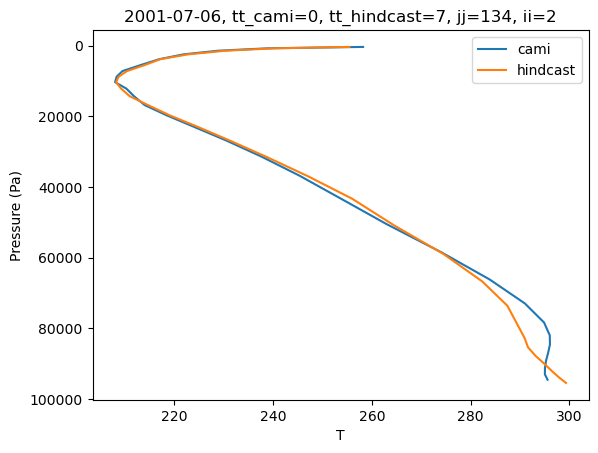

In [87]:
varname = "T"
date = "2001-07-06"
tt_hindcast=7
tt_cami=0 
jj=134 ; ii=2

plot_da( varname = varname,
             date = date,
             tt_hindcast=tt_hindcast, tt_cami=tt_cami, 
             jj=jj, ii=ii,
       )